### Match and questionnaire data from speed dating experiment run by Columbia professors Ray Fisman and Sheena Iyengar

https://data.world/annavmontoya/speed-dating-experiment

Data collection is doubtful.

In [74]:
# reload(clean)
import clean
df = clean.prep()

mapping go_out
mapping goal
mapping condtn
mapping career_c
mapping field_cd
mapping date
mapping race
mapping samerace
mapping gender
match 0 1
pid 1 552
dec_o 0 1


In [80]:
c = ['dec_female', 'dec_male', 'match_female']
y = df[c]
xc = [x for x in df if x not in c]
X_ = df[xc]

In [81]:
import xgboost as xgb
clf_ = xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=np.nan, n_estimators=30, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [82]:
X = pd.get_dummies(X_)
print(X.shape)

(4184, 3332)


In [83]:
import sklearn.cross_validation
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y)

In [84]:
k = 'dec_female'
clf_.fit(X_train, y_train[k], eval_set=[(X_train, y_train[k]), (X_test, y_test[k])], eval_metric='auc', early_stopping_rounds=20)

[0]	validation_0-auc:0.786729	validation_1-auc:0.77288
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.792459	validation_1-auc:0.77644
[2]	validation_0-auc:0.794401	validation_1-auc:0.782226
[3]	validation_0-auc:0.800433	validation_1-auc:0.783532
[4]	validation_0-auc:0.808308	validation_1-auc:0.788211
[5]	validation_0-auc:0.810768	validation_1-auc:0.792131
[6]	validation_0-auc:0.812296	validation_1-auc:0.793366
[7]	validation_0-auc:0.813984	validation_1-auc:0.795769
[8]	validation_0-auc:0.815864	validation_1-auc:0.795004
[9]	validation_0-auc:0.81735	validation_1-auc:0.796322
[10]	validation_0-auc:0.818218	validation_1-auc:0.797989
[11]	validation_0-auc:0.821699	validation_1-auc:0.800816
[12]	validation_0-auc:0.823619	validation_1-auc:0.801909
[13]	validation_0-auc:0.824804	validation_1-auc:0.802592
[14]	validation_0-auc:0.827255	validation_1-auc:0.804745
[

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=30, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [85]:
s = pd.Series(clf_.feature_importances_, index=X.columns)
s = s[s>0.01]
s.sort()

/Users/davidcottrell/anaconda/envs/35/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  This is separate from the ipykernel package so we can avoid doing imports until


In [86]:
s

hiking_female                                0.014563
tvsports_female                              0.014563
race_o_female_European/Caucasian-American    0.014563
imprace_female                               0.014563
id_female                                    0.014563
from_female_Chicago                          0.014563
theater_male                                 0.014563
field_female_School Psychology               0.019417
mn_sat_female_1,430.00                       0.019417
shopping_female                              0.019417
field_cd_female_Education, Academia          0.029126
position_female_11                           0.029126
reading_female                               0.033981
clubbing_female                              0.033981
exphappy_female                              0.038835
art_female                                   0.043689
concerts_female                              0.043689
pf_o_att_male                                0.048544
race_female_European/Caucasi

Populating the interactive namespace from numpy and matplotlib


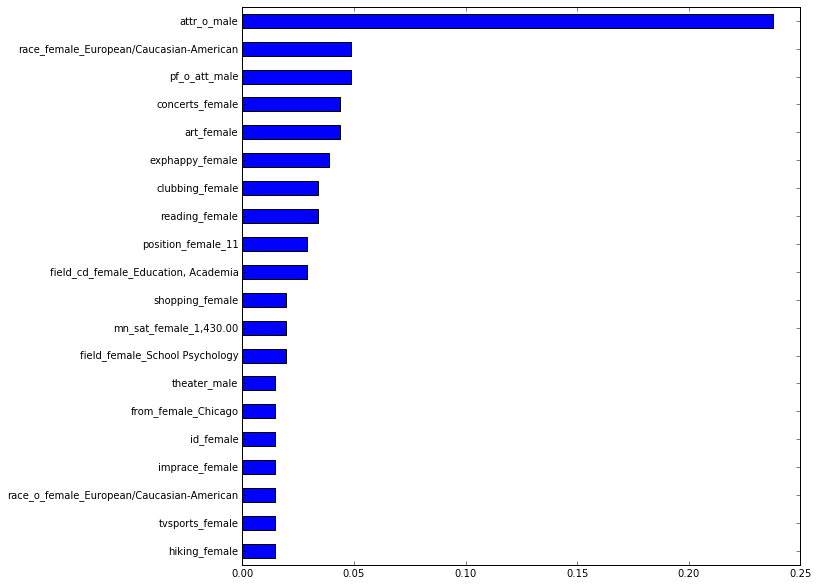

In [87]:
%pylab inline
figure(figsize=(10, 10))
s.plot(kind='barh')

In [88]:
k = 'dec_male'
clf_.fit(X_train, y_train[k], eval_set=[(X_train, y_train[k]), (X_test, y_test[k])], eval_metric='auc', early_stopping_rounds=20)
s = pd.Series(clf_.feature_importances_, index=X.columns)
s = s[s>0.01]
s.sort()

[0]	validation_0-auc:0.813963	validation_1-auc:0.789343
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.827592	validation_1-auc:0.803717
[2]	validation_0-auc:0.828185	validation_1-auc:0.805283
[3]	validation_0-auc:0.833646	validation_1-auc:0.810149
[4]	validation_0-auc:0.834916	validation_1-auc:0.81271
[5]	validation_0-auc:0.836314	validation_1-auc:0.813386
[6]	validation_0-auc:0.838486	validation_1-auc:0.812785
[7]	validation_0-auc:0.839921	validation_1-auc:0.813233
[8]	validation_0-auc:0.841055	validation_1-auc:0.813088
[9]	validation_0-auc:0.841845	validation_1-auc:0.813711
[10]	validation_0-auc:0.843724	validation_1-auc:0.815618
[11]	validation_0-auc:0.845563	validation_1-auc:0.816698
[12]	validation_0-auc:0.847364	validation_1-auc:0.81657
[13]	validation_0-auc:0.847795	validation_1-auc:0.81625
[14]	validation_0-auc:0.848929	validation_1-auc:0.817776
[

/Users/davidcottrell/anaconda/envs/35/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  """


In [89]:
s

music_female                                                                          0.014563
go_out_male_Once a month                                                              0.014563
music_male                                                                            0.014563
positin1_male                                                                         0.014563
shopping_male                                                                         0.014563
go_out_male_Several times a year                                                      0.014563
movies_male                                                                           0.014563
round_female_20                                                                       0.014563
theater_female                                                                        0.019417
race_female_Other                                                                     0.019417
yoga_male                                         

Populating the interactive namespace from numpy and matplotlib


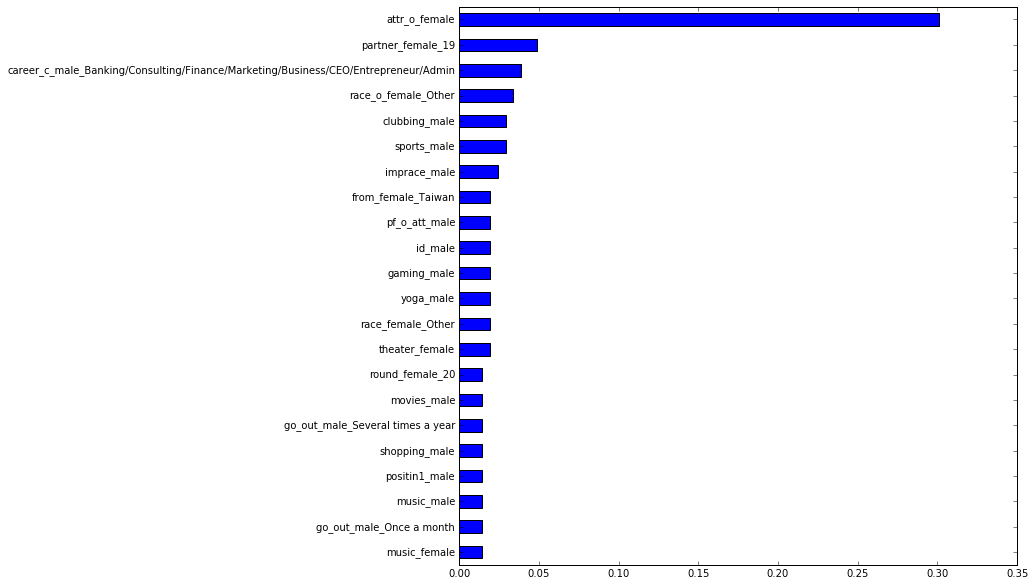

In [90]:
%pylab inline
figure(figsize=(10, 10))
s.plot(kind='barh')

In [91]:
k = 'match_female'
clf_.fit(X_train, y_train[k], eval_set=[(X_train, y_train[k]), (X_test, y_test[k])], eval_metric='auc', early_stopping_rounds=20)
s = pd.Series(clf_.feature_importances_, index=X.columns)
s = s[s>0.01]
s.sort()

[0]	validation_0-auc:0.774683	validation_1-auc:0.746072
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.77898	validation_1-auc:0.744462
[2]	validation_0-auc:0.801503	validation_1-auc:0.778164
[3]	validation_0-auc:0.804044	validation_1-auc:0.778406
[4]	validation_0-auc:0.807597	validation_1-auc:0.77418
[5]	validation_0-auc:0.813239	validation_1-auc:0.780424
[6]	validation_0-auc:0.815186	validation_1-auc:0.779141
[7]	validation_0-auc:0.818645	validation_1-auc:0.779428
[8]	validation_0-auc:0.82117	validation_1-auc:0.787206
[9]	validation_0-auc:0.826263	validation_1-auc:0.78768
[10]	validation_0-auc:0.828015	validation_1-auc:0.790756
[11]	validation_0-auc:0.828248	validation_1-auc:0.791232
[12]	validation_0-auc:0.829546	validation_1-auc:0.791869
[13]	validation_0-auc:0.829788	validation_1-auc:0.792153
[14]	validation_0-auc:0.83068	validation_1-auc:0.792676
[15

/Users/davidcottrell/anaconda/envs/35/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  """


In [92]:
s

clubbing_female                     0.014423
hiking_female                       0.014423
mn_sat_female_1,430.00              0.014423
round_female_10                     0.014423
zipcode_female_48,306               0.014423
gaming_male                         0.019231
from_male_Italy                     0.019231
zipcode_female_0                    0.024038
field_cd_male_Law                   0.024038
art_female                          0.028846
pf_o_att_female                     0.028846
position_female_11                  0.028846
tv_male                             0.033654
go_out_male_Several times a week    0.033654
attr_o_male                         0.216346
attr_o_female                       0.225962
dtype: float32

Populating the interactive namespace from numpy and matplotlib


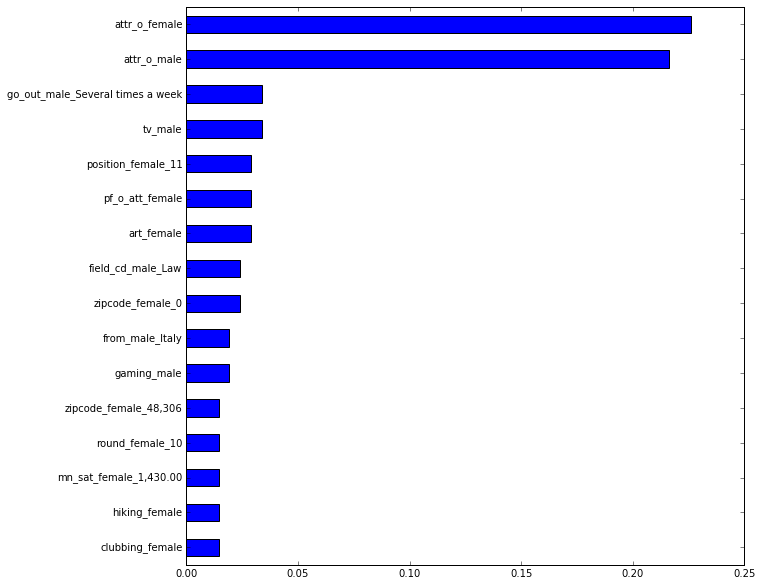

In [93]:
%pylab inline
figure(figsize=(10, 10))
s.plot(kind='barh')